# Selenium
* 브라우저를 직접 실행하여 자동화하고 브라우저 상에 있는 데이터를 수집
* 웹 테스트 자동화

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

* `webdriver` : 파이썬과 브라우저를 연결하기위한 객체
* `Service` : [최신 버전] 어떤 브라우저를 사용하게 할건지 선택
* `ChromeDriverManager` : [최신 버전] Chrome을 사용하기 위한 드라이버 설정

In [ ]:
def get_chrome_driver():
    # 1. 크롬 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성하기
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()), # 가장 많이 바뀐 부분
        options=chrome_options
    )
    
    return driver

In [ ]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
driver.get("https://www.naver.com")

In [ ]:
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("집에가고싶다.")

In [ ]:
driver.find_element(By.CSS_SELECTOR, "#query").clear()
driver.find_element(By.CSS_SELECTOR, "#query").send_keys("바보야")

In [ ]:
# 윈도우 사이즈 조절
driver.set_window_size(800, 800)

In [ ]:
# 스크롤 위치 조절 - javascript를 입력해야 한다.
driver.execute_script("window.scrollTo(50, 600);")

In [ ]:
# 테스트 브라우저 종료
driver.quit()

# 셀레니움으로 네이버 뉴스기사 크롤링

In [ ]:
page = 2
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
url

'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page=2'

In [ ]:
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
driver.get(url)

In [ ]:
articles = driver.find_elements(
    By.CSS_SELECTOR,
    "#section_body li"
)
len(articles)

20

In [ ]:
# 첫 번째 기사만 확인
articles[0].text

'[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나\n[서울경제] LG전자(066570) 의 스마트폰 사업 철수로 출시가 좌초됐던 ‘롤 …\n서울경제2시간전\n30\n이상\n+'

In [ ]:
articles[0].find_element(
    By.CSS_SELECTOR,
    "dt:not(.photo) > a"
).text

'[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나'

In [ ]:
article_list = []

for article in articles:
    title = article.find_element(
        By.CSS_SELECTOR,
        "dt:not(.photo) > a"
    ).text
    
    article_list.append(title)
article_list

['[영상] LG가 포기한 ‘롤러블폰’, 중국이 최초 공개하나',
 '[ET톡]삼성 혁신의 시계추',
 '디즈니+ 국내서 172억원 벌었다…넷플릭스는 768억원',
 "TGA 2020 뜬 펄어비스 '붉은사막'…올해 신작 공개하나",
 '[2021결산/반도체] 해소되지 않은 공급난…세계 대전 발발',
 '美 SEC, 테슬라 조사 중..."태양광 패널 위험 요소 숨겼다"',
 '한국 면적의 16배…태평양 쓰레기섬의 ‘뗏목생태계’, 지속가능할까',
 '삼성전자, 3인 대표이사 전원 교체...한종희·경계현 투톱 체제로',
 '‘킥보드’ 카드 꺼낸 T맵, 종합 모빌리티 플랫폼 선언',
 '“우리도 한다”...마트·슈퍼·홈쇼핑도 퀵커머스·새벽배송',
 '셀트리온 코로나19 치료제 렉키로나 호주에서 조건부 승인',
 '우주 경쟁 중심에 섰던 두 남자, 폰 브라운과 코롤료프',
 '하루도 안돼 1600만 팔로워…방탄소년단 개인 인스타시대 개막',
 '삼성전자 대표이사된 한종희는... 국내 최고의 TV 전문가',
 '삼성, 올 3분기 국내 스마트폰 시장 점유율 85% ‘압도적 1위’',
 '‘AI윤석열’ 등장에…고삼석 전 방통위원 “선관위 나서라" 비판',
 '티맵, 내비 넘어 종합 모빌리티 플랫폼으로 도약 선언… “카카오 기다려!”',
 '탄소 제로 시대…수소 비행기 뜬다',
 'EV 투자 불확실성 증대…美 SEC, 테슬라·루시드 조사 착수',
 '오징어게임 떼돈 벌어도 넷플이 독식…"추가 보상안 법제화해야"']

In [ ]:
driver.quit()

함수화

In [ ]:
article_list = []

def get_article(page):
    driver = get_chrome_driver()
    
    url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105#&date=%2000:00:00&page={}".format(page)
    driver.get(url)
    articles = driver.find_elements( By.CSS_SELECTOR, "#section_body li")

    for article in articles:
        title = article.find_element( By.CSS_SELECTOR, "dt:not(.photo) > a").text
        article_list.append(title)
    
    print("Crawling : {}".format(page))
    
    driver.quit()

In [ ]:
%%time
for page in range(1, 5):
    get_article(page)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 1




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 2




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 3




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Crawling : 4
Wall time: 20.9 s


# thread를 이용해서 크롤링 하기
* `thread`를 활용하는 이유 : IDLE 을 최대한 줄이기 위해서 사용한다.
* 하나의 작업만을 하는 것이 아닌, 동시에 여러 작업을 하기 위함

대략적으로 40% 시간이 절감된다.

In [ ]:
import threading

In [ ]:
article_list = []

for page in range(1, 5):
    th = threading.Thread(target=get_article, args=(page, ))
    th.start()





====== WebDriver manager ======


====== WebDriver manager ======


====== WebDriver manager ======
====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Get LATEST chromedriver version for 96.0.4664 google-chrome
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
import time
sec = 0
while len(article_list) < 80:
    # 1초에 한번씩 멈추기
    time.sleep(1)
    sec += 1
    print(sec, end=" ")

1 2 3 4 5 Crawling : 4
Crawling : 3
6 Crawling : 2
Crawling : 1
7 

# 셀레니움을 이용한 이미지 크롤링
* Youtube 영상을 이미지로 크롤링
* 특정 영역을 자르기
    * pillow : 파이썬에서 이미지를 전처리 해주는 대표적인 패키지
    * 최근에는 opencv가 굉장히 유행중!

In [ ]:
import requests # 동영상 다운로드
from PIL import Image as pil # 이미지 다루기

In [ ]:
url = "https://www.youtube.com/watch?v=yFZh-Wqi7RI&t=120s"
driver = get_chrome_driver()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
driver.get(url)

## 영상 url을 열었더니 재생 버튼이 보여서 재생이 안된다면?

In [ ]:
# 영상 가운데 큰 재생버튼을 눌러주는 코드 입니다.
try:
    driver.find_element_by_css_selector(".ytp-large-play-button.ytp-button").click()
except:
    pass # 만약 재생버튼이 없다면 무시합니다.

In [ ]:
driver.get(url)
driver.save_screenshot("my_screenshot.png")
driver.quit()

(718, 887)


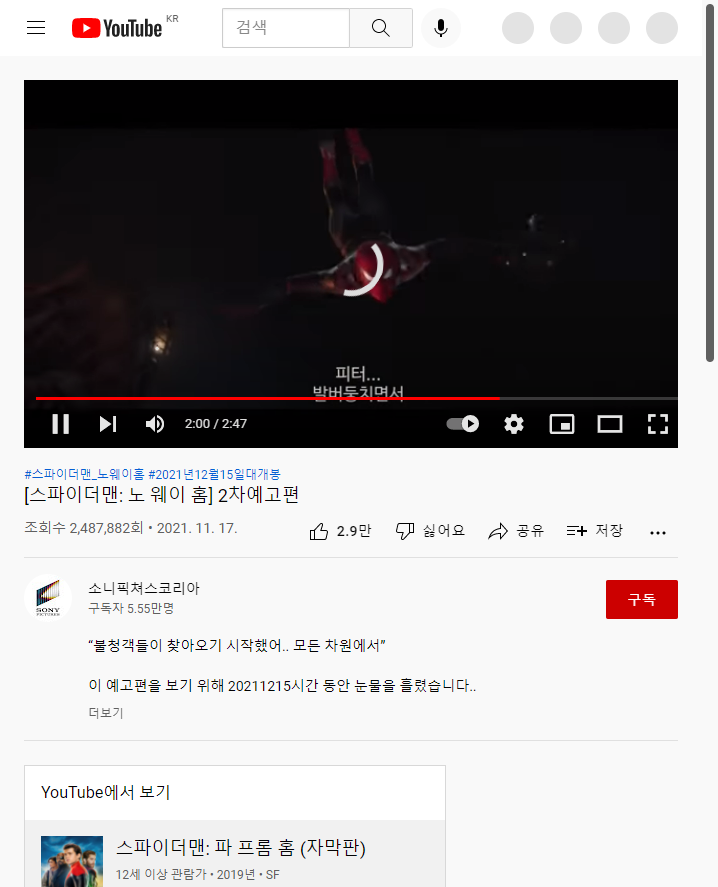

In [ ]:
pil_img = pil.open("my_screenshot.png")
print(pil_img.size)
pil_img

In [ ]:
driver = get_chrome_driver()
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player"
)
movie_player

<selenium.webdriver.remote.webelement.WebElement (session="3ae7a6ee834396266ff59258c5bd8afc", element="862671e8-e0a0-4c3f-8c72-8c59c13ba29f")>

In [ ]:
# element의 위치 찾기
location = movie_player.location
location

{'x': 24, 'y': 80}

In [ ]:
# element의 크기 구하기
size = movie_player.size
size

{'height': 366, 'width': 651}

In [ ]:
# screenshot 찍기
driver.save_screenshot("spider_man_screenshot.png")

True

In [ ]:
driver.quit()

In [ ]:
# 새로 캡쳐한 이미지에서 잘라낼 범위를 계산
# left, top, right, bottom
left = location['x']
top  = location['y']
right = left + size['width']
bottom = top + size['height']

area = (left, top, right, bottom)
area

(24, 80, 675, 446)

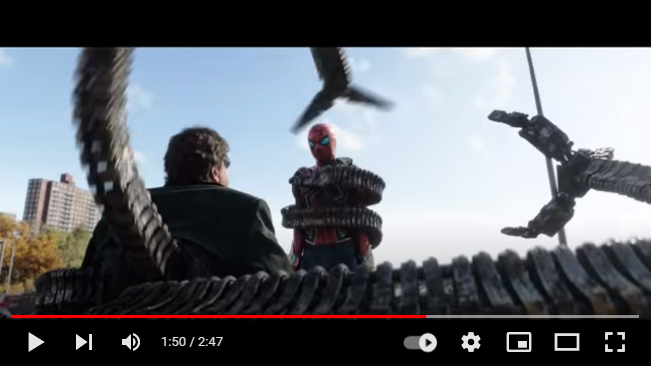

In [ ]:
pil_img = pil.open("spider_man_screenshot.png")
croped_image = pil_img.crop(area)
croped_image

In [ ]:
croped_image.save("croped_spiderman.png")

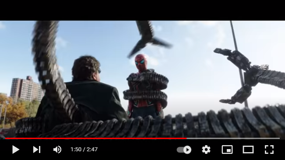

In [ ]:
croped_image.thumbnail((320, 160))
croped_image

# User-Agent 부여하기
* `fake_useragent`

In [ ]:
# selenium에서 user-agent 확인하기
driver = get_chrome_driver()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36


In [ ]:
# fake_useragent 활용하기
from fake_useragent import UserAgent

UserAgent().chrome

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1468.0 Safari/537.36'

In [ ]:
# usergent를 임의로 설정할 수 있는 driver 생성 함수
def get_chrome_driver_useragent():
    agent = UserAgent().chrome
    chrome_options = webdriver.ChromeOptions()
    
    chrome_options.add_argument("user-agent={}".format(agent))
    
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()),
        options=chrome_options
    )
    
    return driver

In [ ]:
driver = get_chrome_driver_useragent()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36


# Headless 설정하기
- `Mac`, `Windows`는 `GUI 환경`
- `리눅스(ec2)` 환경은 `CLI 환경`

headless 설정을 하면 눈에는 보이지 않지만 메모리(RAM) 내에서 돌아가는 브라우저를 띄울 수 있다.

In [ ]:
def get_chrome_driver_headless():
    agent = UserAgent().chrome
    chrome_options = webdriver.ChromeOptions()
    
    # 창은 안뜨고 메모리에서만 돌아가는 브라우저 만들기.
    chrome_options.add_argument("headless")
    
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()),
        options=chrome_options
    )
    
    return driver

In [ ]:
driver = get_chrome_driver_headless()
driver.get("https://www.naver.com")
title = driver.title
print(title)
driver.quit()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


NAVER


셀레니움을 이용한 크롤링은 `GUI`환경에서 모든 테스트를 마치고 headless 설정만 해서 `CLI` 환경에서 돌린다.

# 동영상 다운로드

In [ ]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [ ]:
url = "https://www.youtube.com/watch?v=yFZh-Wqi7RI"

# www. 을 ss로 바꾸면 유튜브 비디오를 다운로드 할 수 있는 페이지가 뜬다.
download_url = "https://ssyoutube.com/watch?v=yFZh-Wqi7RI"

In [ ]:
driver = get_chrome_driver()
driver.get(download_url)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\hkedu\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


In [ ]:
download_button = driver.find_element(
    By.CSS_SELECTOR,
    "#sf_result > div > div > div.info-box > div.link-box > div.def-btn-box > a"
)

# selenium에서 attribute 얻어내기
title = download_button.get_attribute("download")
download_source = download_button.get_attribute("href")

title, download_source

('[스파이더맨- 노 웨이 홈] 2차예고편.mp4',
 'https://r1---sn-bpb5oxu-3c2d.googlevideo.com/videoplayback?expire=1638881051&ei=uwKvYZudIfXQ8gPVjrDwCQ&ip=156.146.50.132&id=o-AETw643J594808dkD7O09aVXSOoDRaZ68I2TECIzloCw&itag=22&source=youtube&requiressl=yes&mh=sj&mm=31%2C29&mn=sn-bpb5oxu-3c2d%2Csn-3c27sn7e&ms=au%2Crdu&mv=m&mvi=1&pl=24&initcwndbps=575000&vprv=1&mime=video%2Fmp4&ns=HwnvWmnfu-XuuNvnaLpICaUG&ratebypass=yes&dur=167.206&lmt=1637125923798940&mt=1638859267&fvip=10&fexp=24001373%2C24007246&c=WEB&txp=5516222&n=sdpAR8SDe4Kj_g&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cns%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgc5nUm9_mQaoBWGIkU7TOnQ7BkKx8TmjpSu-H-sOnAVMCICB3SzcpPE8uV0begxtLKCDYrxNfwxnqHCr92aSrwuI6&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRAIgbFW2ALT5LG_RieH0atEFTGDUvwuQyodKygLeQ0ihj1wCIDa9YfWl9XDg78e0WwdobMeCQPsks0HNKXTFZkImBCLT&title=%5B%EC%8A%A4%ED%8C%8C%EC%9D%B4%EB%8D%94%EB%A7%A8%3A%20%EB%85%B8%20%EC%9B%A8%EC%9D%B4%20%ED%99%88%5D%20

In [ ]:
size = download(title, download_source)
driver.quit()
print("{} Mb".format(round(size/1024/1024,2)))

35.07 Mb
